In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (20, 10)
import warnings
import sklearn

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# In this project I have covered Following:
# Data Cleaning
# Feature Engineering
# One Hot Encoding
# Outlier Detection
# Dimensionality Reduction
# Grid Search CV
 
# Later is was exported in pickle file and write a python flask server can consume pickle file and 
# make prediction for you

# Used Python as Programming language
# Pandas for Data Cleaning
# Matpolotlib for Data Visualization
# Sklearn for Model Building
# Python Flask server for Backend server
# HTML, CSS, Javascript for website building

# Here I have used Supervised Learning, there we have labelled data

In [4]:
# opened the file
#'pd.read_csv' is the function
df = pd.read_csv(r'C:\Users\Asad Ahmed\Desktop\Data Sheets\Bengaluru_House_Data.csv') 
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
# Looking for the shape of the data
df.shape

(13320, 9)

In [6]:
# Examining the area type feature, looking total area type
# Group by 'area_type'
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
# Dropping some of the unnecessary columns
df2 = df.drop(['area_type','availability', 'balcony','society'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Starting the data cleaning

In [8]:
# Lets see the blank values inside the columns
# Below code showing the sum of NA values in different columns
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# The another way could be to take the average of specific column's values and then fill those where
# NA values are
# Below as we have so many rows, therefore by dropping the NA values it won't make any big difference.
df3 = df2.dropna() 

In [10]:
# Let's check if we have any blank values in our columns
df3.isnull().sum()
# As we can see that there are not any blank values in the data 

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [12]:
print (df.shape)
df3.shape

(13320, 9)


(13246, 5)

In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df3['size'].unique()
# Here we have found that BHK and Bedroom are the same terms, 
# therefore taking the first digits into a new column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
# In below code we have extracted the very first digit of the column size, 
# created a new column 'bhk' and stored those init.
# also changed it's type from object to integer.

df3['bhk'] = df3['size'].apply (lambda x: int(x.split(' ')[0]) )

In [17]:
# Checking the type that is int now and that is correct
df3['bhk'].dtype

dtype('int64')

In [18]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [19]:
# Looking for unique values in bhk column

df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
# By observing the above values we found that there are uncommon values found in the data, 
# that are 43 and 27 rooms in the bunglows this is unusual, therefore looking values more than 20

df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
# Above we have seen that there are some errors like 43 and 27 bhk compared to sqft area are too much
# so in order to observe this more wer are required to review the 'total_sqft' column as well
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
# Defined a function it will convert the value into the float, if not then will return false
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
# Here I have applied the above created function, 
# it will convert the value of column 'total_sqft' to float
# Below numbers are singel numbers not found in any range that could be dropped if there any error
# corresponding to bhk column

df3[df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [24]:
# Now let's negate the above function,
df3[~ df3['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [25]:
# By using the negate function it has provided the numbers that are in range and difficult to drop
# if there is any error in data, so to resolve this I will take the average of this range,
# first I will convert the value into the float

In [26]:
# Created a function, it will take the range of values and convert them into float and 
# return you an average, or if there is a single value it will convert into float and return 
# or if there any other value that having string as well it will ignore that

def avg_sqft (x):
    token = x.split('-')
    if len (token) == 2:
        return (float(token[0]) + float(token[1])) / 2
    try:
        return float(x)
    except:
        return None

In [27]:
# Copied the df3 and created a new data frame to apply the function
df4 = df3.copy()

In [28]:
# From df4 'total_sqft' column I have applied the above created function
# Function name is "avg_sqft"

df4['total_sqft'] = df4['total_sqft'].apply(avg_sqft)

In [29]:
# Testing the function
avg_sqft('1110')

1110.0

In [30]:
df4['total_sqft'].unique

<bound method Series.unique of 0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64>

In [31]:
# By looking the above data we don't have any range available as our function applied successfully

In [32]:
# In previous data frame 3 the index 30 value was falling in between the range
df3['total_sqft'].loc[30]

'2100 - 2850'

In [33]:
# After applying the formula in Data frame 4 we can see that at an index 30 there is a single number
df4['total_sqft'].loc[30]

2475.0

In [34]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [35]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [36]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [37]:
# Now we are required to find the price of per square ft, for this I am making a copy of new df
df5 = df4.copy()

In [38]:
df5

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [39]:
# Below we have total_sqft column is being divided by price column to find the per_sqft rate
# I have multiplied the price column to lac because the price in available in lac Rs.

df5['per_sqft_price'] = df5['price']*100000 / df5['total_sqft']

In [40]:
# Below we have per_sqft_price column, that would be used further to find the price
df5

,location,size,total_sqft,bath,price,bhk,per_sqft_price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [41]:
# Location column values that are unique
len (df5.location.unique())
len (df5['location'].unique())

1304

In [42]:
# Counting the total locations in locations column
df5['location'].count()

13246

In [43]:
# I have cleared the spaces in location column if there any
df5['location'] = df5['location'].apply(lambda x: x.strip())

In [44]:
# Now we will try to find the location values that have 1 or 2 data points
# Now viewing the values in the location column that have less values like 1, 2 or similar
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats.tail(900)

location
Silk Board               5
Devi Nagar               5
Govindpura               5
Amruthnagar              5
Hiremath Layout          5
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 900, dtype: int64

In [45]:
# Above data shows that there are some location that have less than 10 values, so we will remove
# such values to reduce the dimensionality curve

In [46]:
# Lets see that how many values in location column have less than and equal to 10 values
location_stats[location_stats <= 10]

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [47]:
len (location_stats[location_stats <= 10])

1052

In [48]:
# We observed that we have total 1052 values that have upto 10 values
# Here location_stats = location 
location_stats_lessthen_10 = location_stats[location_stats <= 10]
location_stats_lessthen_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [49]:
len(df5.location.unique())

1293

In [50]:
location_stats_lessthen_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [51]:
# In location column as shown above we had some location values that were only less then or equal to 
# 10 so We replaced those values from 'others' by applying following lambda function

df5['location'] = df5['location'].apply (lambda x: 'others' if x in location_stats_lessthen_10 else x)

In [52]:
# Now by replacing to others we have less loacation values
len(df5['location'].unique())

242

## Outliers Detection and Removal

In [53]:
# To remove outliers we are using domain knowledge, here we are assuming that a typical room
# is around 300 sqft, so if there any value is less 300 sqft area, we will remove that

In [54]:
# In order to find unusal values we are applying following
df5[df5['total_sqft'] / df5['bhk'] < 300]

,location,size,total_sqft,bath,price,bhk,per_sqft_price
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [55]:
# Above we found that there are 744 such values, so I will remove all by using negate sign
df6 = df5 [~ (df5['total_sqft'] / df5['bhk'] < 300)]

In [56]:
df6

,location,size,total_sqft,bath,price,bhk,per_sqft_price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [57]:
# Let's see some basic statistics about this column 
df6.per_sqft_price.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: per_sqft_price, dtype: float64

In [58]:
# By observing the above numbers we found that some outliers like: min price per sqft are '267' 
# that is extremely low and smimilarly the maximum price are '176470' that is very high may be 
# it is correct due to prime location but in order to make a generic model I will remove such
# extreme values by applying following function

# We are going to write a function that can remove these extreme cases based on standard daviation
# we are assuming that our dataset have normal distribution most of the dataset points around 68% 
# dataset should lie between mean and standard deviation 
# to do this per location we are finding the mean and standard deviation and filtering out the any data
# points which are beyond one standard deviation, 


# Here 'pps' is price per square foot, and 'm' is mean and 'st' is standard deviation
def remove_pps_outliers(df): # taking dataset as input
    df_out = pd.DataFrame()
    for key, subdf in df.groupby ('location'): # grouping the dataset by location first
        m = np.mean(subdf.per_sqft_price) # calculating mean for per location dataset
        st = np.std(subdf.per_sqft_price) # calculating standaed deviation
        reduced_df = subdf[(subdf.per_sqft_price>(m - st)) & (subdf.per_sqft_price <= (m + st))] # filtering all those datponts that are beyond the standard deviation, anything M-SD above and M+SD below , will be kept in reduced dataframe and append those dataset  
        df_out = pd.concat([df_out, reduced_df],ignore_index = True) # appending both datasets to df_out variable
    return df_out
 

In [59]:
df7 = remove_pps_outliers(df6)

In [60]:
df7.per_sqft_price.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: per_sqft_price, dtype: float64

In [61]:
# df4['total_sqft'] = df4['total_sqft'].apply(avg_sqft)
df7.shape

(10241, 7)

In [62]:
# After the removal of per_sqft outliers we observed in our data that there in some cases the  prices 
# of 2  bed room apartment is higher then the prices of 3 bed room apartment even in same location, 
# so in order to look all those values we are writing a function that will develop a scatter plot to 
# review the cases that how much 2BHK prices are higher than 3BHK.

In [63]:
# The below function is drawing a scatter plot, it will plot 02 bedrooms and 03 bedrooms apartment
# it takes 02 inputs 'loation' and 'dataframe', blue points representing 02 bedroom apartments and 
# green markers are representing 03 bedroom apartments, X-axis has total_sqft_area and Y-axis has 
# price_per_sqft 

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Ft')
    plt.title(location)
    plt.legend()

In [64]:
# Printing location to select as input in below function
df7['location'].unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

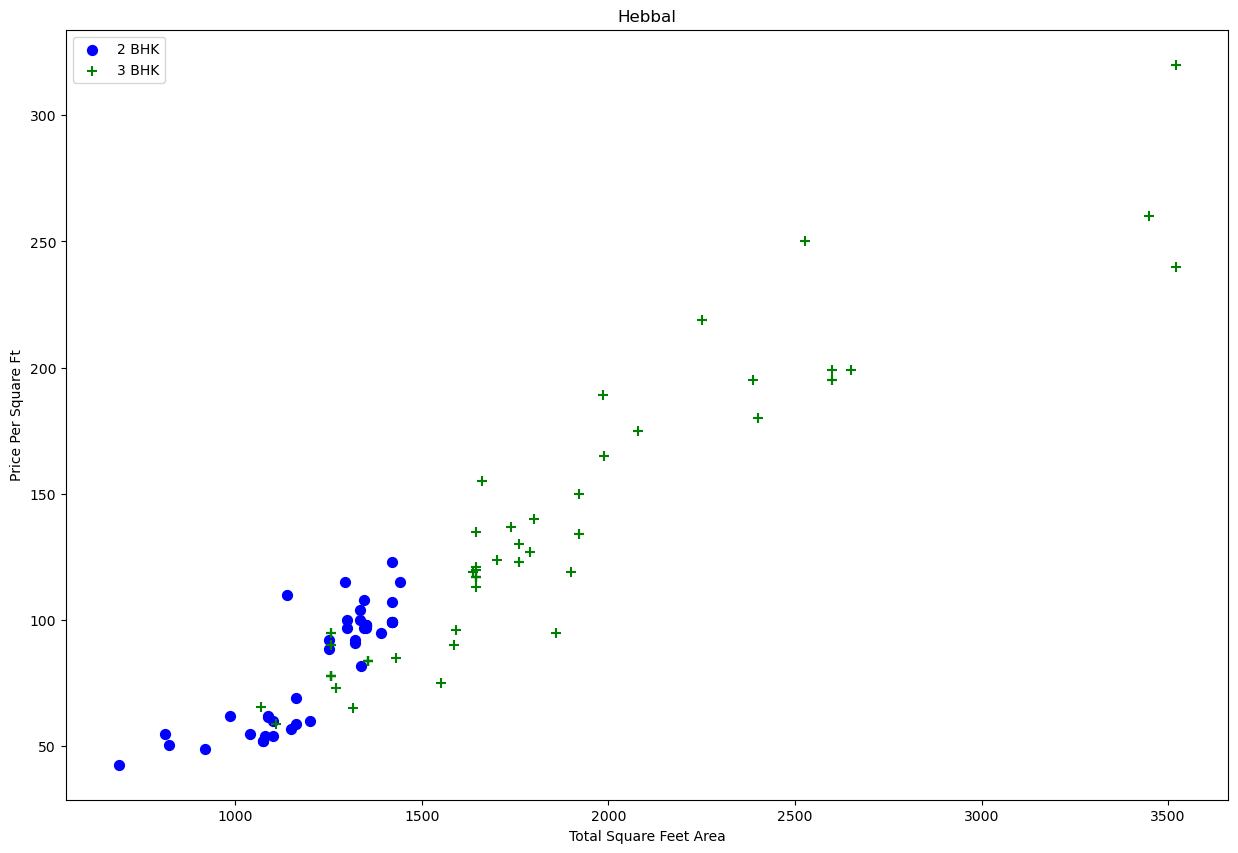

In [65]:
# As per the scatter plot function, here passing two values one for Data frame and second for location
plot_scatter_chart (df7, 'Hebbal')

In [66]:
# By observing the above plot it is revealed that the prices of 2 bedrooms are higher than 3 Bedrooms,
# as there are some outliers found in the data, therefore I will work to remove these unusal values by 
# applying following function

#     {
#         '1' : {
#             'mean': 4000,
#             'std': 2000,
#             'count': 34,
#         },
        
#         '2' : {
#             'mean': 4300,
#             'std': 2300,
#             'count': 22
#         },    
#     }

# We are removing those 2BHK aprtments whose per_sqft_price is less than mean per_sqft_price of 
# 1BHK apartments


def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): # Going through every location DF
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'): # Again creating new data frame based on BHK
            bhk_stats[bhk] = {                         # Per BHK data frame computing Mean, Std, Count
                'mean': np.mean(bhk_df.per_sqft_price),
                'std': np.std(bhk_df.per_sqft_price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'): # Trying to exclude data points whose price 
            stats = bhk_stats.get(bhk-1)               # whose value of price per sqft is less then
            if stats and stats['count'] > 5:           # the mean of previous BHK, like 2BHK mean
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.per_sqft_price < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')    # price is less then the mean price of 1BHK
        

In [67]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

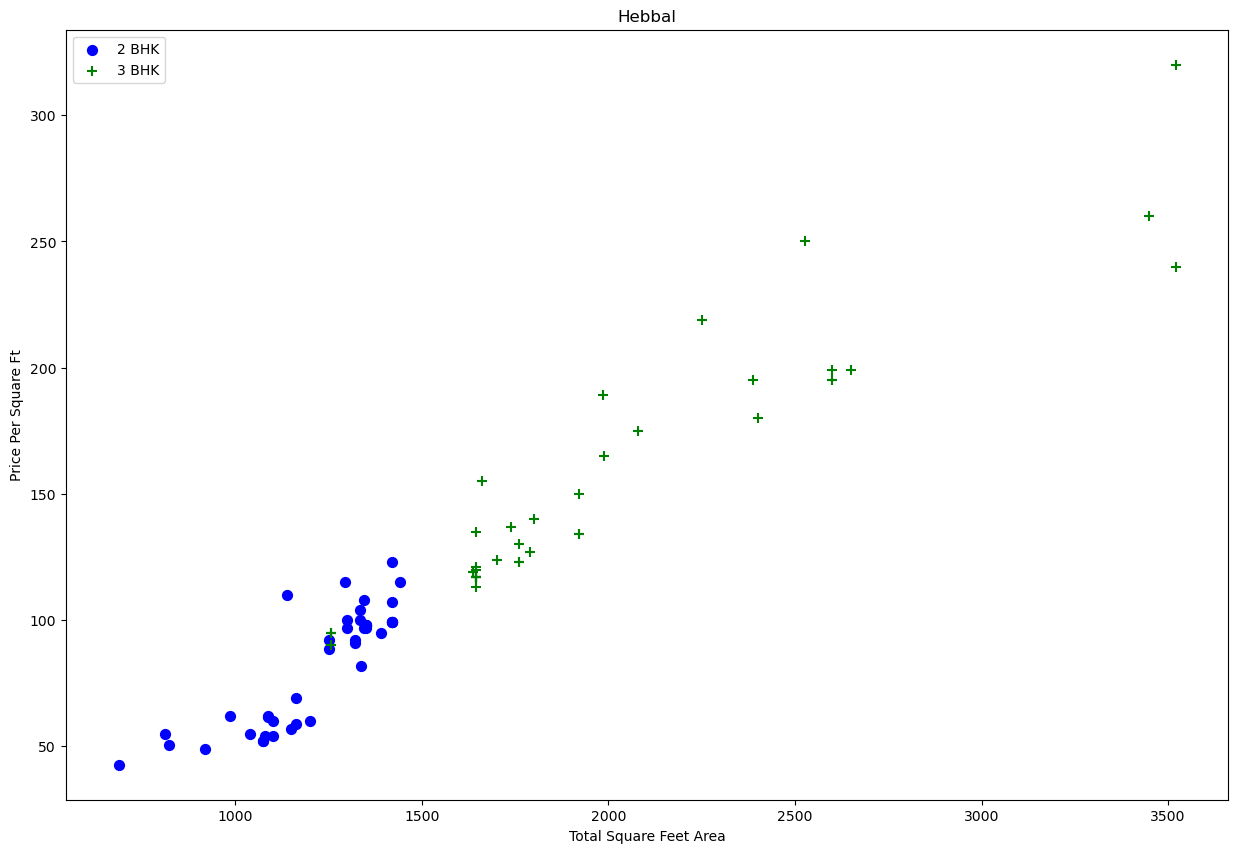

In [68]:
# Plotting again the same location to view the changes
plot_scatter_chart (df8, 'Hebbal')

In [69]:
# From above scatter plot we can observe that the prices of two bedrooms are comparatively lesser
# then the prices of 3BHK, we have very less data points where some prices are still higher however,
# our data looks fine at this stage.

Text(0, 0.5, 'Count')

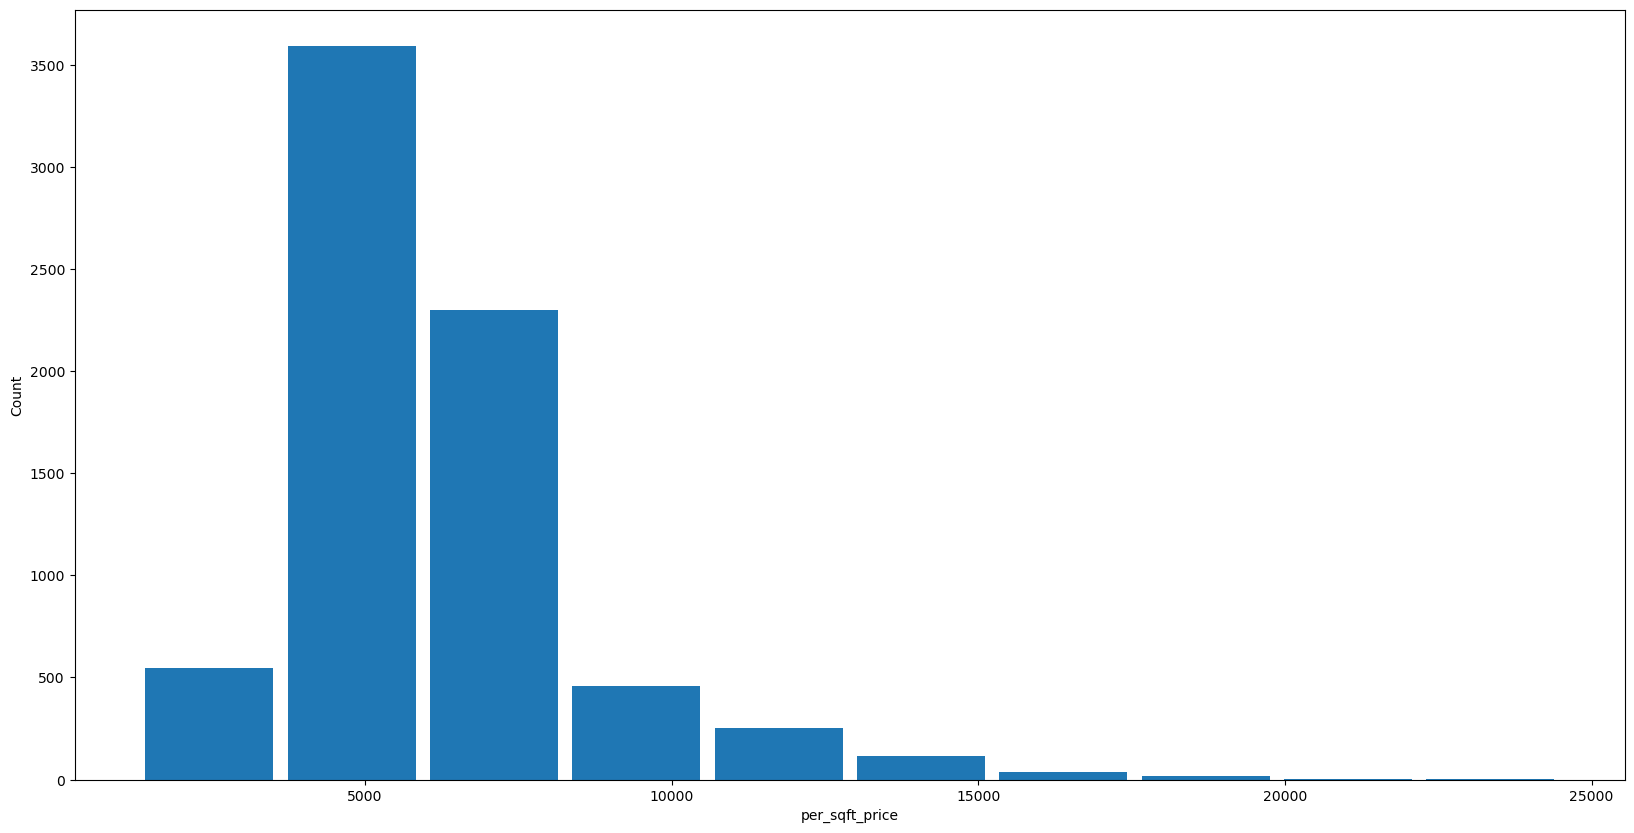

In [70]:
# How many propeties are in Per_sqft area, making graph for this
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.per_sqft_price, rwidth = 0.9)
plt.xlabel('per_sqft_price')
plt.ylabel('Count')

In [71]:
# Now working to remove bathroom value errors, for which looking the unique values in this 
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [72]:
# We observerd that there are 12, 13 or even 16 bathroom in some apartments that is kind of unusual,
# let's see the data, for which filtering the it where number of bathrooms are > 10 

df8[df8['bath'] > 10]

,location,size,total_sqft,bath,price,bhk,per_sqft_price
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [73]:
# Assuming here that after the meeting with business manager we are come to knwon 
# that total number of bathroom greater than total number of aprtments + 2 are outliers, so we will
# remove those values, 
# plotting a histogram to view the bathrooms column
 

Text(0, 0.5, 'Count')

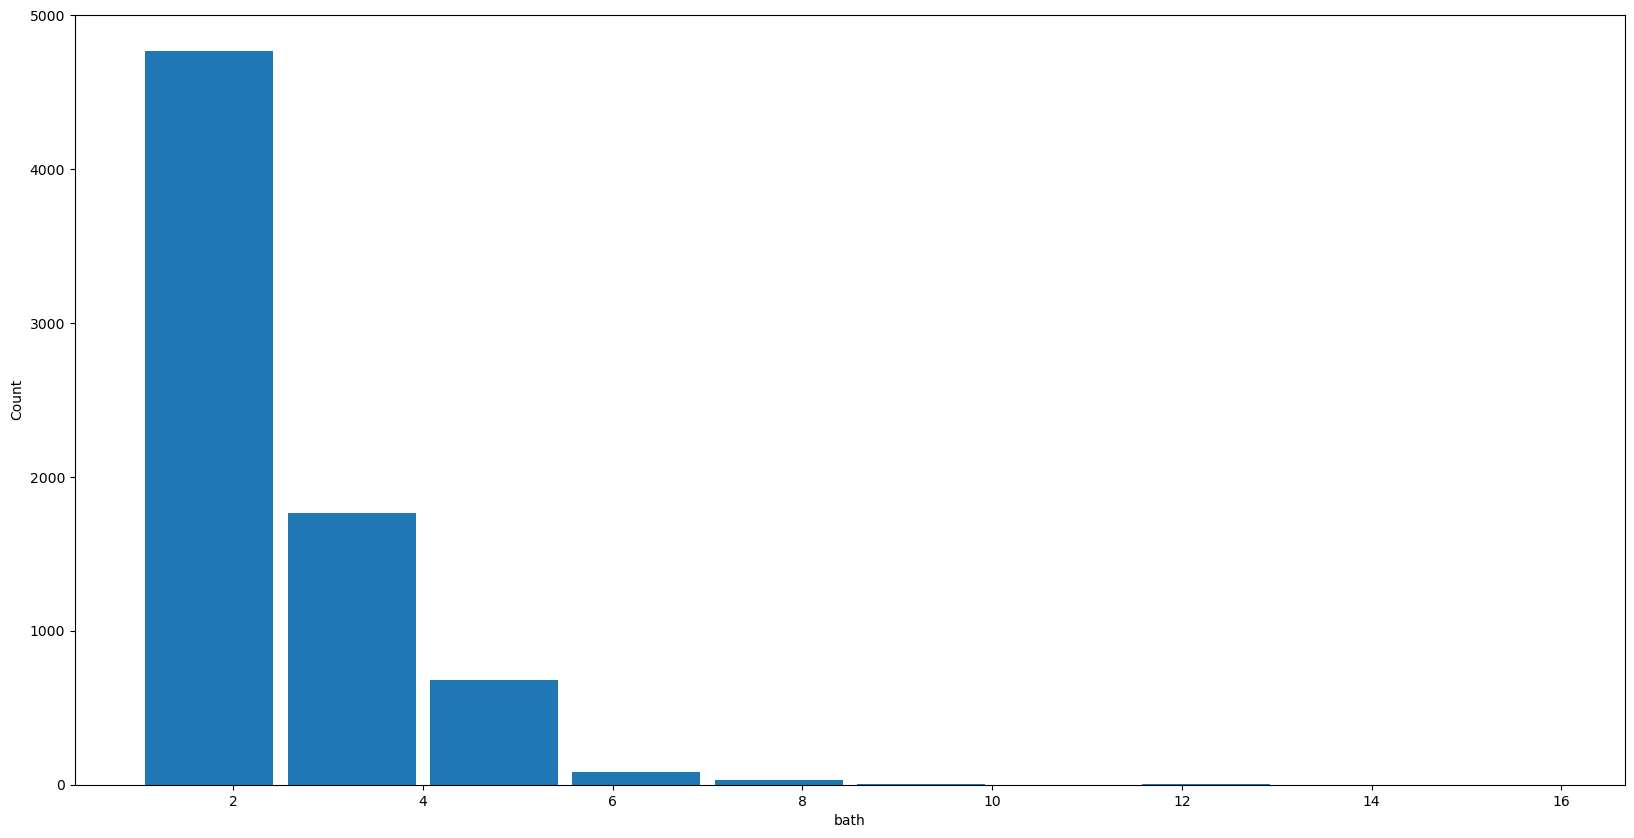

In [74]:
# How many propeties are in Per_sqft area, making graph for this
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.bath, rwidth = 0.9)
plt.xlabel('bath')
plt.ylabel('Count')

In [75]:
# Now comparing to BHK column to find the errors

df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,per_sqft_price
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [76]:
# Below I have removed the bathrooms values that have greater than BHK + 2

df9 = df8[df8.bath < df8.bhk + 2]
df9.shape 

(7251, 7)

In [77]:
df9.head()

,location,size,total_sqft,bath,price,bhk,per_sqft_price
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [78]:
# At this stage our data looking like neat and clean, so we will prepare it for machine learning
# training, before this we will drop some unnecessary column, like: per_sqft_price, size.

df10 = df9.drop(['size', 'per_sqft_price'], axis = 'columns')

In [79]:
print(df10.shape)
df10.head()

(7251, 5)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [80]:
# Our datafrmae is cleaned up well and now we are going to build a machine learning model
# We are going to build machine learning model, therfore use K-Fold Cross validation and Grid Search CV
# to come up with best alogirith and find the best parameter.

# As we have the column location, the M.L model cannot interprt as this is the categorical data therefore
# we will use One Hot Encoding, also called dummies method.

In [81]:
# Using here one Hot Encoding by using 'Pandas Dummy Method'
# it will create the one value for a specific value and 0 for others
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# creating a new dataframe by concatinating the previous dataframe df10 and dummies dataframe 
# To avoid a dummy variable trap we have to drop one column
df11 = pd.concat([df10, dummies.drop('others', axis = 'columns')], axis = 'columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,others,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,others,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,others,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,others,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Here we are dropping the column locations becasue it is covered dummies' columns
df12 = df11.drop('location', axis = 'columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df12.shape

(7251, 245)

In [85]:
# Creating X variable that should contain only independent varaible, whereas Y is the dependent 
# variable therefore creating a new dataframe and dropping price column.

X = df12.drop('price', axis = 'columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# X Contains all the indepndent columns

In [87]:
# We are creating a 'y' variable that contains the price column, it is the dependent variable
y = df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [88]:
# After craeting the X and y columns we are now dividing out data set into training and testing.
# Training data is for the training purpose and rest testing part is for the model performance.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [89]:
# Now creating a Liner Regression model, lr_clf = LinearRegression Classifier

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874279

In [90]:
# We will try different models with couple of good parameters to comeup with the best optimal model
# Therefore here we are using KFold Cross Validation
# Shuffle split will randomized the samples so each of fold has equal distribution of data samples, so 
# it will not taret one area
# Importing required methods 

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [91]:
# As we have seen that Linear Regression performed better and scored max 85 percent, so why don't we use
# other regression techniques, like Lasso Regression Decision Tree Regression
# Hence we are using different alogorithms and figuring out which one gives us the best score, for
# reason this I am using a method that is  'Grid Search CV', it can run my model on different 
# parameters and different regressors and provides the best score

In [92]:
# writing a function to find my model using 'GridSearchCV'
# Below I have used LinearRegression, Lasso and DecisionTree in a python dictionary named algos
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize' : [True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse', 'firedman_mse'],
                'splitter': ['best', 'random']
            } 
        }           
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame (scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.713565,"{'criterion': 'mse', 'splitter': 'best'}"


In [93]:
# From the above socre we can see that Linear Regression is the best model, and also come to know that
# the best parameters.

In [94]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [95]:
# Takes (location, sqft, bath, bhk) as an input and return the estimated price,
# below method np.where inside the function takes the column value and shows 0 index 

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [96]:
predict_price ('1st Phase JP Nagar', 1000, 2, 2)

83.49904677167738

In [97]:
predict_price ('1st Phase JP Nagar', 1000, 3, 3)

86.80519395194304

In [98]:
predict_price ('Indira Nagar', 1000, 2, 2)

181.27815484007036

In [99]:
# Downloading the model into a pickle file for Python Flask Server

import pickle 
with open ('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [100]:
# Also importing column information in json format,
# All columns converted into lower case annd dumping all of then into json file, using json.dump
# function to convert info into json format

import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))